<a href="https://colab.research.google.com/github/chindymar/python-for-data-science/blob/main/prediction_il.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Project ini menggunakan dataset dari kaggle yaitu https://www.kaggle.com/code/sandragracenelson/lung-cancer-prediction

Melakukan instalasi jcompl yang akan kita gunakan untuk training data

In [ ]:
pip install jcopml

Melakukan import library yang kita butuhkan untuk melakukan prediksi data disini kita menggunakan naive bayes maka dari itu kita menggunakan sklearn

In [ ]:

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.naive_bayes import GaussianNB
from jcopml.pipeline import num_pipe, cat_pipe

Melakukan pembacaan terhadap data, disini kita menggunakan data dalam format csv dan menyimpannya ke dalam variabel df

In [ ]:
df = pd.read_csv('/content/sample_data/survey lung cancer.csv')

Membaca setiap column yang ada pada file tersebut

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

Mengambil data 5 teratas dalam data tersebut menggunakan method head()

In [ ]:
df.head().T

,0,1,2,3,4
GENDER,M,M,F,M,F
AGE,69,74,59,63,63
SMOKING,1,2,1,2,1
YELLOW_FINGERS,2,1,1,2,2
ANXIETY,2,1,1,2,1
PEER_PRESSURE,1,1,2,1,1
CHRONIC DISEASE,1,2,1,1,1
FATIGUE,2,2,2,1,1
ALLERGY,1,2,1,1,1
WHEEZING,2,1,2,1,2


Membaca jumlah baris dan kolom pada file tersebut

In [ ]:
df.shape

(309, 16)

Menghitung seluruh data yang duplikat agar data yang kita training dapat terhasil dengan baik

In [ ]:
df.duplicated().sum()

33

Melakukan drop terhadap seluruh data yang duplikat. dapat dilihat begitu kita membaca data kembali jumlah kolom yang awalnya 309 menjadi 276

In [ ]:
df = df.drop_duplicates()
df.shape

(276, 16)

In [ ]:
X = df.drop(columns="LUNG_CANCER")
y = df.LUNG_CANCER

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((220, 15), (56, 15), (220,), (56,))

In [ ]:

preprocessor = ColumnTransformer([
      ('numeric', num_pipe(), ["AGE","YELLOW_FINGERS","ANXIETY","PEER_PRESSURE","CHRONIC DISEASE","FATIGUE ","ALLERGY ","WHEEZING","ALCOHOL CONSUMING","COUGHING","SHORTNESS OF BREATH","SWALLOWING DIFFICULTY","CHEST PAIN"]),

])

In [ ]:
from sklearn.naive_bayes import GaussianNB
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', GaussianNB())
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['AGE', 'YELLOW_FINGERS',
                                                   'ANXIETY', 'PEER_PRESSURE',
                                                   'CHRONIC DISEASE',
                                                   'FATIGUE ', 'ALLERGY ',
                                                   'WHEEZING',
                                                   'ALCOHOL CONSUMING',
                                                   'COUGHING',
                                                   'SHORTNESS OF BREATH',
                                                   'SWALLOWING DIFFICULTY',
                                                   'CHEST PAIN'])])),
                ('algo', GaussianNB())])

In [ ]:

pipeline.score(X_train, y_train)

0.9045454545454545

In [ ]:

pipeline.score(X_test, y_test)

0.9107142857142857

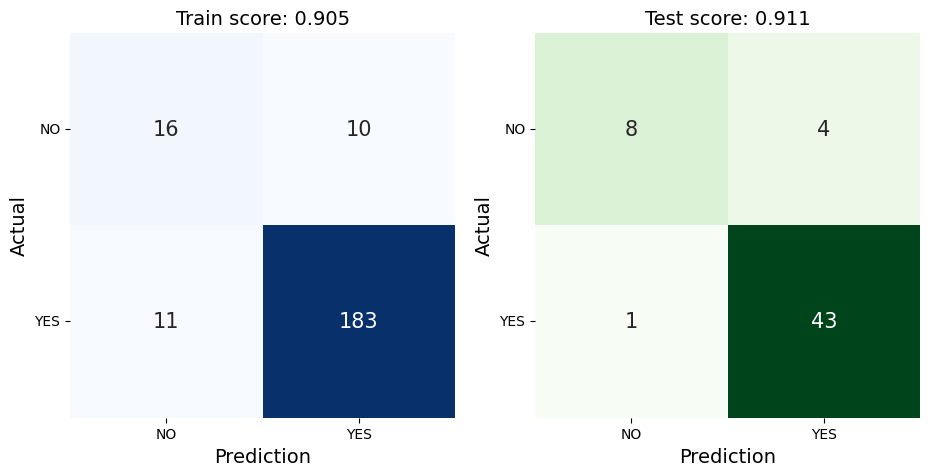

In [ ]:
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(X_train, y_train, X_test, y_test, pipeline)

In [ ]:

X_pred = pd.read_csv("/content/sample_data/testdata.csv")
X_pred

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,F,59,1,1,1,1,1,1,1,1,1,1,1,1,2
1,M,20,1,1,1,2,1,2,2,1,1,1,1,1,1


In [ ]:

X_pred["LUNG_CANCER"] = pipeline.predict(X_pred)
X_pred

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,F,59,1,1,1,1,1,1,1,1,1,1,1,1,2,NO
1,M,20,1,1,1,2,1,2,2,1,1,1,1,1,1,YES
